# Topic: Naive Bayes Classifier

Md Kamran Ahmad

ID:160103020033

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(88)

In [3]:
def get_training_examples():
    X1 = np.array([[8, 7], [4, 10], [9, 7], [7, 10], [9, 6], [4, 8], [10, 10]])
    y1 = np.ones(len(X1))
    X2 = np.array([[2, 7], [8, 3], [7, 5], [4, 4],  [4, 6], [1, 3], [2, 5]])
    y2 = np.ones(len(X2)) * -1
    return X1, y1, X2, y2

In [6]:
X1, y1, X2, y2= get_training_examples()
x = np.vstack((X1, X2))
y = np.hstack((y1, y2))

print(x)
print(y)

[[ 8  7]
 [ 4 10]
 [ 9  7]
 [ 7 10]
 [ 9  6]
 [ 4  8]
 [10 10]
 [ 2  7]
 [ 8  3]
 [ 7  5]
 [ 4  4]
 [ 4  6]
 [ 1  3]
 [ 2  5]]
[ 1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]


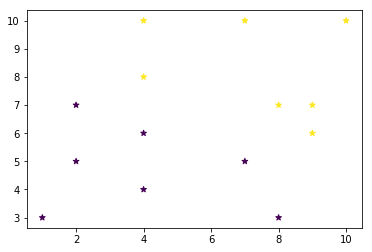

In [7]:
plt.scatter(x[:,0],x[:,1],marker='*', c=y) 
plt.show()

In [8]:
# add a column with value 1 at the first position.
Xa= np.c_[np.ones(x.shape[0]), x]
print(Xa)

[[ 1.  8.  7.]
 [ 1.  4. 10.]
 [ 1.  9.  7.]
 [ 1.  7. 10.]
 [ 1.  9.  6.]
 [ 1.  4.  8.]
 [ 1. 10. 10.]
 [ 1.  2.  7.]
 [ 1.  8.  3.]
 [ 1.  7.  5.]
 [ 1.  4.  4.]
 [ 1.  4.  6.]
 [ 1.  1.  3.]
 [ 1.  2.  5.]]


In [9]:
#calculate weighted sum
def linear_regression(x,w):
    val=0
    for ix,iy in zip(x,w):
        val+=ix*iy
    return val


#decide -1 or 1
def activate(val):
    return np.sign(val)


def predict(X, w):
    hp=[]
    for x in X: 
        lr=linear_regression(x,w)
        h=activate(lr)
        hp.append(h)
    return hp


def get_miss_indexes(py, y):
    miss=[]
    for i in range(len(y)):
        if py[i]!=y[i]:
            miss.append(i)
    return miss


def perceptron_train(X, y):
    w = np.random.rand(3)
    py=predict(X,w)
    miss=get_miss_indexes(py,y) 
    while len(miss)>0:
        rnd=np.random.choice(miss)
        rx=X[rnd]
        ry=y[rnd]
        w=w+rx*ry
        
        py=predict(X,w)
        miss=get_miss_indexes(py,y)
    return w

In [10]:
#a variation. using epoch and learning rate
def perceptron_train2(X, y):
    w = np.random.rand(3)
    py=predict(X,w)
    miss=get_miss_indexes(py,y) 
    eta=0.1
    epoch=50000
    for i in range(epoch):
        if len(miss)==0:             #all data are classified.
            break
        rnd=np.random.choice(miss)
        rx=X[rnd]
        ry=y[rnd]
        w=w+eta*rx*ry
        
        py=predict(X,w)
        miss=get_miss_indexes(py,y)
        
    return w

In [11]:
w = np.random.rand(3)
print(w)
py=predict(Xa,w)
print(py)

[0.64755105 0.50714969 0.52834138]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [12]:
miss=get_miss_indexes(py,y)
print(miss)
print('total miss classification=', len(miss), 'total=',len(y))

[7, 8, 9, 10, 11, 12, 13]
total miss classification= 7 total= 14


In [13]:
rnd=np.random.choice(miss)
print(rnd)
rx=Xa[rnd]                 #Xa er random 
ry=y[rnd]                  #y er random
print(rx)
print(ry)

12
[1. 1. 3.]
-1.0


In [14]:
w=perceptron_train(Xa,y)
print(w)

[-63.27777635   3.23140505   7.13012829]


In [15]:
py=predict(Xa,w)
print(py)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [16]:
w1=perceptron_train2(Xa,y)
print(w1)

[-6.75713966  0.54874489  0.57760866]


In [17]:
py=predict(Xa,w1)
print(py)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [18]:
xt=[1,4,4]
predict([xt],w)

[-1.0]